In [4]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [8]:
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:

features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [12]:
# Adding cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

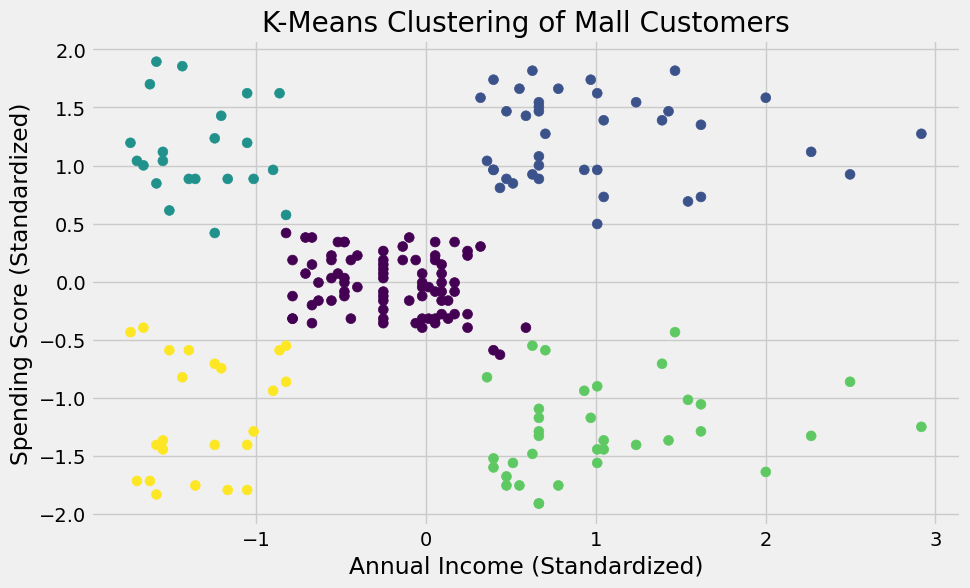

In [13]:

# Visualizing clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.show()

In [14]:
# Displaying cluster centroids
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

Cluster Centroids:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [15]:
# Predicting cluster for new data points
new_data = np.array([[40, 60], [70, 20]])  # Example new data points: [Annual Income, Spending Score]
scaled_new_data = scaler.transform(new_data)  # Standardizing new data points

In [16]:
predicted_clusters = kmeans.predict(scaled_new_data)  # Predicting clusters for new data points
print(f"Predicted Clusters for New Data Points: {predicted_clusters}")

Predicted Clusters for New Data Points: [0 3]


In [17]:
predicted_clusters = kmeans.predict(scaled_new_data)  # Predicting clusters for new data points
print(f"Predicted Clusters for New Data Points: {predicted_clusters}")

Predicted Clusters for New Data Points: [0 3]


In [18]:
# Evaluating clustering performance using Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5546571631111091
